## Visualise fitting results 

In [ ]:
include("main_utils.jl")

default_plot_setting()

Plots.GRBackend()

# Create summary stats from fitting results

In [4]:
include("main_utils.jl")
include("data_setup.jl")
include("fit_utils.jl")
include("suppl_utils.jl")

obs_estimated_validation_plot (generic function with 1 method)

In [6]:
df_res = read_master_with_fit_summary();

In [7]:
include("fit_utils.jl")
df_obs_all = @pipe @subset(df_obs, :strat .== "all") |> @select(_, Not(:strat))
df_EVI = read_EVI_summary(df_obs_all);

### Mean comparison

In [5]:
include("main_utils.jl")
include("fit_utils.jl")

plot_pdf_ccdf_validate (generic function with 1 method)

# WAIC weights

In [24]:
include("main_utils.jl")
include("fit_utils.jl")
model_names = get_model_names()

3-element Vector{String}:
 "ZeroInfNegativeBinomial"
 "ZeroInfPoissonLogNormal"
 "ZeroInfPoissonLomax"

In [29]:
rem_lis = ["Danon_2013", "Leung_2017",  #"CoMix2",
    #"CoMix2_at", "CoMix2_be", "CoMix2_dk",
    #"CoMix2_ee", "CoMix2_gr", "CoMix2_hr",
    #"CoMix2_it", "CoMix2_pl", "CoMix2_pt",
]
df_res_ana = @subset(df_res, @byrow (:key in rem_lis) == false);
df_EVI_ana = @subset(df_EVI, @byrow (:key in rem_lis) == false);

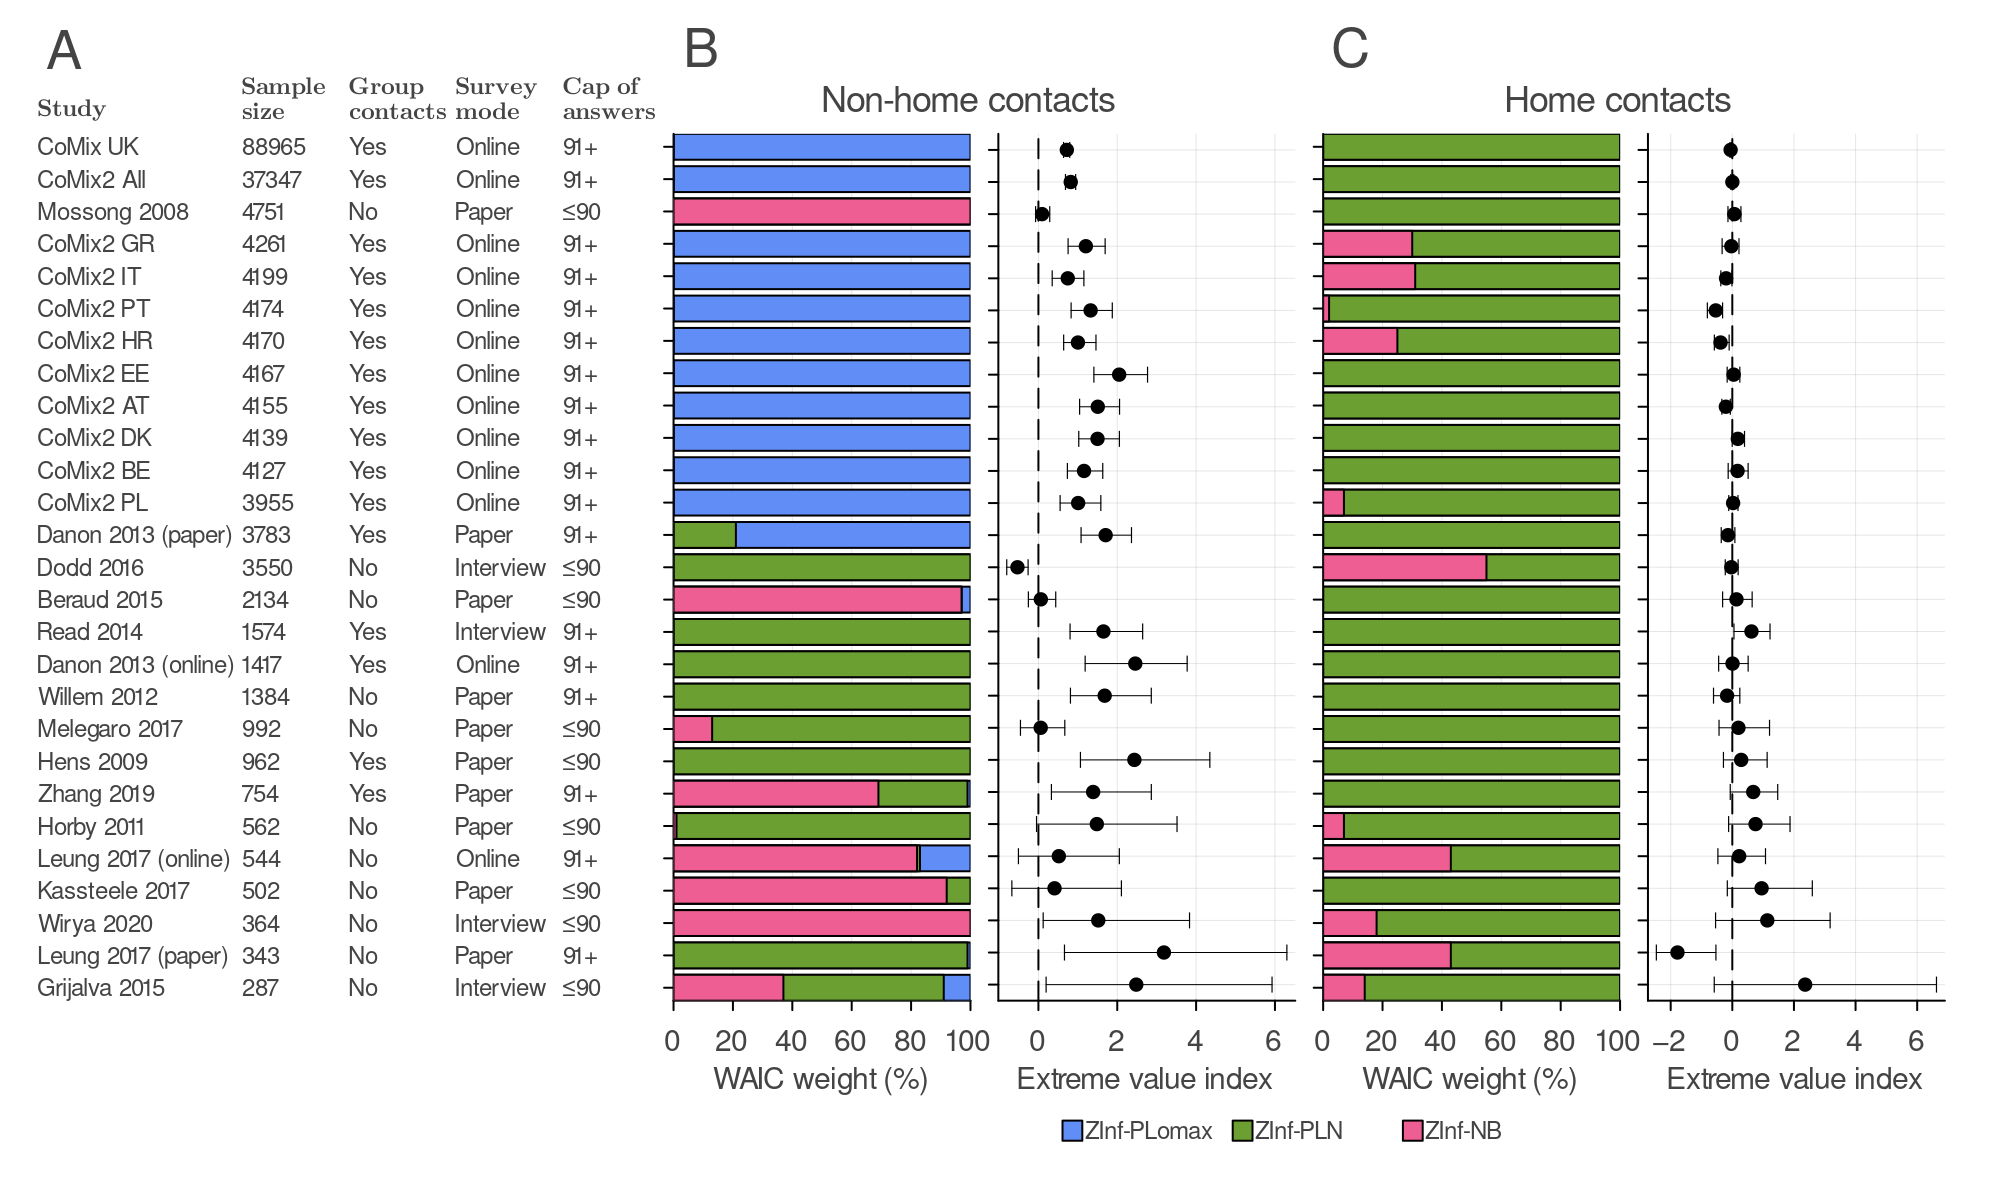

In [32]:
include("fit_utils.jl")
pl = plot_bar_waic_pretty(df_obs, df_res_ana, df_EVI_ana)
savefig(pl, "../fig/waic_comparison.png")
pl

## Fractional multinomial regression for meta-regression

In [186]:
include("main_utils.jl")

plot_pdf_ccdf_validate (generic function with 1 method)

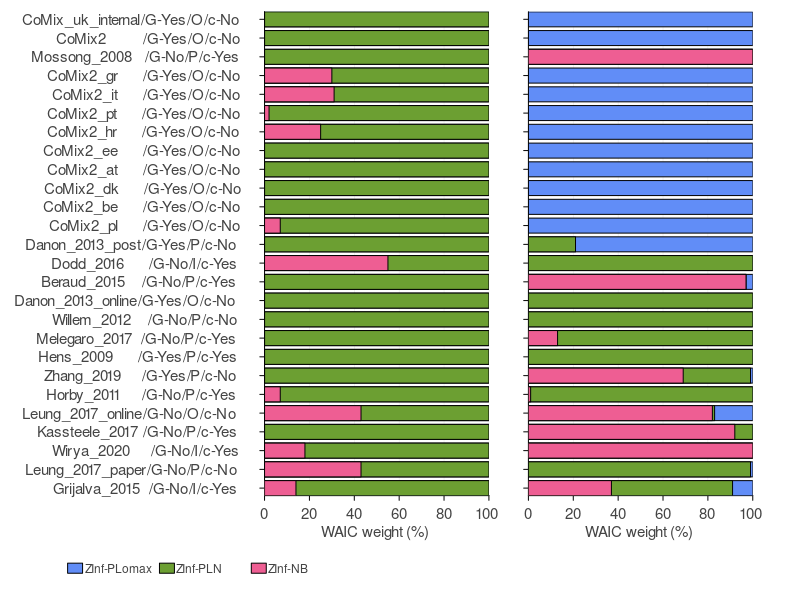

In [94]:
df_ana = prep_fmnl_vars(df_res_ana)
sort!(df_ana, :n_sample)
ytk = df_ana[:, :key_pri];
plot_bar_waic(df_obs, df_res_ana, ytk = ytk) #, df_EVI=df_EVI_nhm)

In [95]:
df_ana = prep_fmnl_vars(df_res_ana);
#@select(df_ana, Not(model_names)) |> display
;

In [96]:
pred, Y, x_names = one_hot_encoding_multi_vars(df_ana);

FormulaTerm
Response:
  y_dummy(continuous)
Predictors:
  1
  (n_sample)->log10(n_sample)
  group_c(DummyCoding:2→1)
  mode_cate(DummyCoding:3→2)
  cutoff_less90(DummyCoding:2→1)

In [97]:
include("main_utils.jl")
pred, Y, x_names = one_hot_encoding_multi_vars(df_ana);
@time chn = sample(model_fmnl(pred, Y), NUTS(), 2000; progress = true)

FormulaTerm
Response:
  y_dummy(continuous)
Predictors:
  1
  (n_sample)->log10(n_sample)
  group_c(DummyCoding:2→1)
  mode_cate(DummyCoding:3→2)
  cutoff_less90(DummyCoding:2→1)

┌ Info: Found initial step size
└   ϵ = 0.4
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:10


 42.046676 seconds (76.35 M allocations: 9.878 GiB, 8.05% gc time, 76.85% compilation time)


Chains MCMC chain (2000×26×1 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 1
Samples per chain = 2000
Wall duration     = 26.66 seconds
Compute duration  = 26.66 seconds
parameters        = β1[1], β1[2], β1[3], β1[4], β1[5], β1[6], β2[1], β2[2], β2[3], β2[4], β2[5], β2[6]
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Use `describe(chains)` for summary statistics and quantiles.


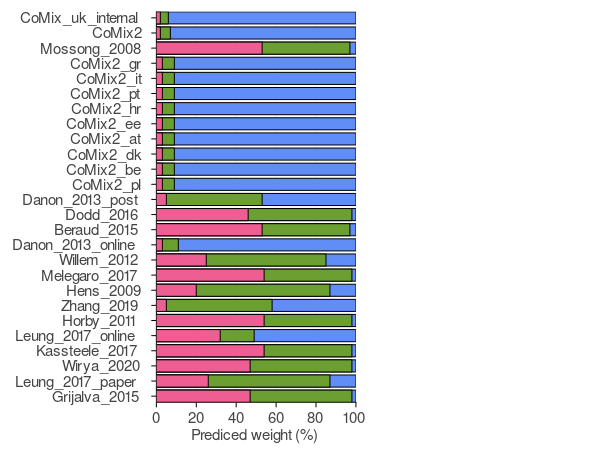

In [98]:
include("main_utils.jl")
df_pred_cum = pred_fmnl_multi_vars(chn, pred)
plot_stacked_bar(df_pred_cum, model_names; xlabel="Prediced weight (%)")

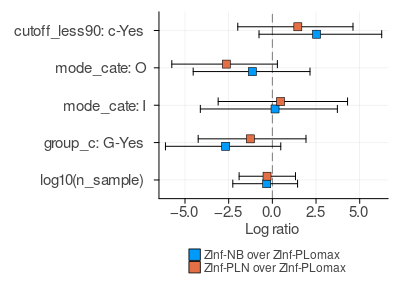

In [99]:
include("main_utils.jl")
# TODO: delete this part in the future
chn_res_multi = extract_chain_info(chn)
n_x = size(pred, 2)
forestplot_fmnl_multi_vars(chn_res_multi[Not([1, n_x+1]), :], x_names[2:end])

In [100]:
include("main_utils.jl")
include("fit_utils.jl")
chn_res = repeated_univariate_fmnl_reg(df_ana);

FormulaTerm
Response:
  y_dummy(continuous)
Predictors:
  1
  (n_sample)->log10(n_sample)
  group_c(DummyCoding:2→1)
  mode_cate(DummyCoding:3→2)
  cutoff_less90(DummyCoding:2→1)

┌ Info: Found initial step size
└   ϵ = 0.8
┌ Info: Found initial step size
└   ϵ = 0.8
┌ Info: Found initial step size
└   ϵ = 1.6
┌ Info: Found initial step size
└   ϵ = 1.6


In [ ]:
	n_β = nrow(chn_res) ÷ 2
	est = chn_res[1:end, :median]
	xerr_l = chn_res[1:end, :xerr_l]
	xerr_u = chn_res[1:end, :xerr_u]
    ytk = (1:(n_β +4 ),
        [
        "Larger vs smaller", boldstring("Log10 of sample size"),
        "Yes vs no", boldstring("Group contact"),
        "Interview vs paper", "Online vs paper", boldstring("Survey mode"),
        "≤90 vs 91+", boldstring("Cap of answers"),
        ])

(1:9, ["Larger vs smaller", "𝐋𝐨𝐠10 𝐨𝐟 𝐬𝐚𝐦𝐩𝐥𝐞 𝐬𝐢𝐳𝐞", "Yes vs no", "𝐆𝐫𝐨𝐮𝐩 𝐜𝐨𝐧𝐭𝐚𝐜𝐭", "Interview vs paper", "Online vs paper", "𝐒𝐮𝐫𝐯𝐞𝐲 𝐦𝐨𝐝𝐞", "≤90 vs 91+", "𝐂𝐚𝐩 𝐨𝐟 𝐚𝐧𝐬𝐰𝐞𝐫𝐬"])

In [120]:
chn_res_multi

Row,parameters,mean,median,var,std,ess,rhat,lower,upper,xerr_l,xerr_u
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,β1[1],1.47812,1.54684,6.52754,2.5549,1561.94,1.00221,-3.44227,6.4012,4.92039,4.92308
2,β1[2],-0.329608,-0.323969,0.854479,0.92438,1492.88,1.00182,-2.26956,1.43807,1.93995,1.76768
3,β1[3],-2.73434,-2.67903,2.78259,1.66811,1838.93,1.00003,-6.17431,0.426596,3.43997,3.16094
4,β1[4],0.210928,0.153911,3.84801,1.96163,1890.4,1.0036,-4.06518,3.77895,4.27611,3.56802
5,β1[5],-1.11939,-1.14422,2.90948,1.70572,2132.44,1.00095,-4.50691,2.17929,3.38752,3.29868
6,β1[6],2.60751,2.5284,3.20517,1.7903,1966.39,0.999917,-0.68391,6.33811,3.29142,3.7306
7,β2[1],2.39428,2.35999,5.52377,2.35027,1753.76,1.00069,-2.08635,6.90024,4.48063,4.50596
8,β2[2],-0.306654,-0.30481,0.671311,0.819336,1490.89,1.0007,-1.90417,1.3224,1.59752,1.62905
9,β2[3],-1.24195,-1.25906,2.44538,1.56377,1710.65,1.00076,-4.22805,1.94252,2.9861,3.18447


In [119]:
chn_res

Row,parameters,mean,median,var,std,ess,rhat,lower,upper,xerr_l,xerr_u,var_name
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String
1,β1[2],-1.26489,-1.28351,0.459911,0.678167,823.311,1.00035,-2.52502,0.0842732,1.26014,1.34916,log10(n_sample)
2,β1[2],-4.03364,-3.98717,1.75453,1.32459,767.604,0.99968,-6.6574,-1.45517,2.62376,2.57847,group_c: G-Yes
3,β1[2],1.10983,1.06187,3.05253,1.74715,1300.26,1.00119,-2.16003,4.62768,3.26986,3.51786,mode_cate: I
4,β1[3],-3.27357,-3.23245,1.67668,1.29487,1174.22,1.00369,-5.65457,-0.586674,2.381,2.68689,mode_cate: I
5,β1[2],3.7224,3.66222,1.78149,1.33473,1185.22,1.00162,1.22714,6.4707,2.49526,2.7483,cutoff_less90: c-Yes
6,β2[2],-1.32611,-1.32364,0.441456,0.664421,672.9,1.00194,-2.649,-0.0444231,1.32289,1.28168,log10(n_sample)
7,β2[2],-2.97485,-2.95066,1.21226,1.10103,843.705,1.00204,-4.9989,-0.75882,2.02405,2.21603,group_c: G-Yes
8,β2[2],0.879701,0.806583,2.9433,1.7156,1243.45,1.00161,-2.39863,4.27857,3.27833,3.39887,mode_cate: O
9,β2[3],-3.54322,-3.49719,1.49191,1.22144,1302.01,1.00142,-5.80341,-1.17065,2.26019,2.37256,mode_cate: O


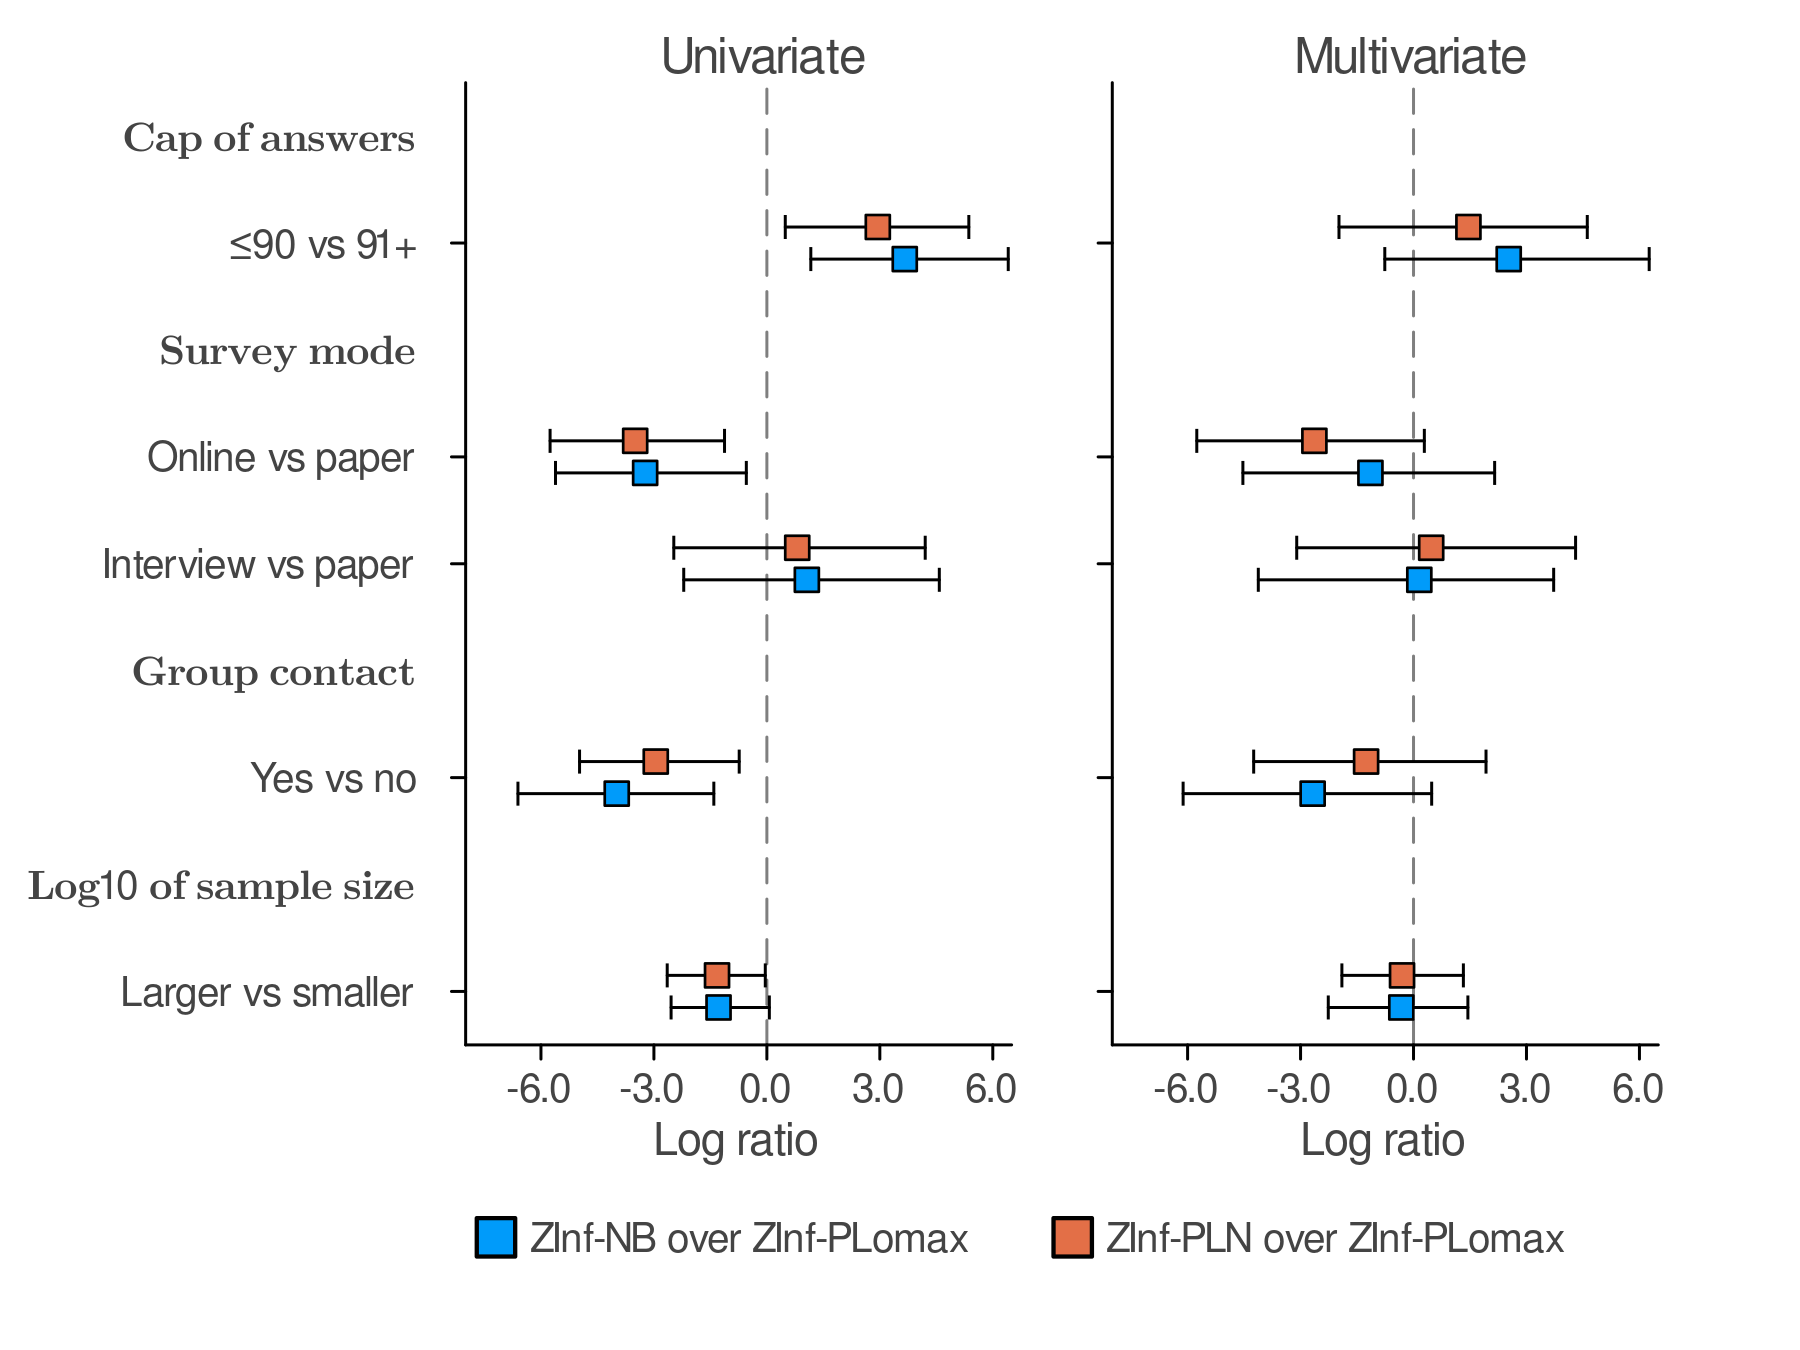

In [185]:
include("fit_utils.jl")
pl = plot_meta_reg(chn_res, chn_res_multi)
plot!(pl, dpi=300)
savefig(pl, "../fig/meta_reg.png")
pl

## Fitting validation
TODO: will be removed. 

In [ ]:
include("main_utils.jl")
include("fit_utils.jl")

In [ ]:
model_names = get_model_names()

In [ ]:
key = "CoMix2"
plot_pdf_ccdf_validate(key)

In [ ]:
key = "Read_2014"
plot_pdf_ccdf_validate(key)

In [ ]:
include("main_utils.jl")
include("fit_utils.jl")
key = "Leung_2017_online"
plot_pdf_ccdf_validate(key)

In [ ]:
key = "Leung_2017_paper"
plot_pdf_ccdf_validate(key)

In [ ]:

pl = plot(; xlim = [0, 50], ylim = [-4, 0])
dd_home = res["dds"]["home"]


In [ ]:
df_tmp